# Import used modules

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../src') 
import benchmark_utils as bu
import analysis_utils as au

/Users/julian/opt/anaconda3/envs/OpenCADDBenchmark/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


# Run Alignments for OpenCADD.superposition for the CAMK and CMGC Structures

Perform all pairwise alignments for the given sample structures. Every method performs 2500 alignments for the 50 CAMK and 50 CMGC structures. The benchmark is done with an Intel Core i5-1038NG7 CPU and 16 GB of RAM.

In [2]:
#bu.run_alignments(sample1_path="/Users/julian/PythonProjects/Bachelor/benchmark/CAMK_samples.txt", 
#                  sample2_path="/Users/julian/PythonProjects/Bachelor/benchmark/CMGC_samples.txt", 
#                  output_path="../data/OpenCADD_results/<NAME_OF_FILE>")

# Create a Dataframe containing the Alignments of all five Methods

The alignments for PyMol and ChimeraX MatchMaker are done in the respectively programs and are saved in seperate files. For the analysis, the DataFrames are combined.

In [3]:
columns = ["reference_id", "mobile_id", "method", "rmsd", 
           "coverage", "reference_size", "mobile_size", "time", 
           "SI", "MI", "SAS", "ref_name", "ref_group", "ref_species", 
           "ref_chain", "mob_name", "mob_group", "mob_species", "mob_chain"]
superposer_CAMK_CMGC = pd.read_csv("../data/OpenCADD_results/superposer_benchmark_CAMK_CMGC.csv", names=columns)
pymol_CAMK_CMGC = pd.read_csv("../data/PyMol_results/pymol_benchmark_CAMK_CMGC.csv", names=columns)
chimerax_CAMK_CMGC = pd.read_csv("../data/ChimeraX_results/mmaker_benchmark_CAMK_CMGC.csv", names=columns)
all_CAMK_CMGC = pd.concat([superposer_CAMK_CMGC, pymol_CAMK_CMGC, chimerax_CAMK_CMGC]).reset_index(drop=True)

### Compute the relative Coverage

The relative coverage is computed the following way:

coverage / min(lenght of structure 1, lenght of structure 2)

In [4]:
au.compute_rel_cov(all_CAMK_CMGC)

# Analysis

## General Checks

In [5]:
counts, nans, times = au.general_checks(all_CAMK_CMGC)

Check if every value is present.
It should be 2500 for every value, because there are 2500 alignments performed per method.

In [6]:
counts

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
matchmaker,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
mda,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
mmligner,2500,2500,2450,2450,2450,2450,2450,2450,2450,2450,2500,2500,2500,2500,2500,2500,2500,2500,2450
pymol,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500
theseus,2500,2500,2499,2499,2499,2499,2499,2499,2499,2499,2500,2500,2500,2500,2500,2500,2500,2500,2499


Next, we check for missing alignments. Some Methods have problems with some structures. 

In this case, 1 alignment is missing for Theseus and 50 for MMLigner. All missing alignments for MMLigner are with the structure 4fv3 of ERK2.
The entries with missing alignments are removed for further analysis.

In [7]:
nans

,reference_id,mobile_id,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
method,,,,,,,,,,,,,,,,,,,
mmligner,50,50,0,0,0,0,0,0,0,0,50,50,50,50,50,50,50,50,0
theseus,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0


In [8]:
all_CAMK_CMGC[all_CAMK_CMGC["rmsd"].isna()]

,reference_id,mobile_id,method,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,ref_name,ref_group,ref_species,ref_chain,mob_name,mob_group,mob_species,mob_chain,rel_cov
1246,4fg7,7cga,theseus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CaMK1a,CAMK,Human,A,p38g,CMGC,Human,A,NaN
2538,5oor,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHK1,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2588,3mft,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASK,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2638,2yex,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHK1,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2688,4ft0,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHK1,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2738,3lm5,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRAK2,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2788,4nif,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RSK3-b,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2838,5av2,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAPK1,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2888,5a6o,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAPK3,CAMK,Human,A,Erk2,CMGC,Human,A,NaN
2938,5n50,4fv3,mmligner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIM1,CAMK,Human,A,Erk2,CMGC,Human,A,NaN


In [9]:
all_CAMK_CMGC = all_CAMK_CMGC.dropna()

During the computation of the alignments, the time is measured.  For all OpenCADD methods combined the CPU-time is about 11.5 hours. The time for downloading the structures is not included.
PyMol align took less than a minute.

In [10]:
times

method
matchmaker     18.57
mda            20.73
mmligner      671.63
pymol           1.12
theseus        15.13
Name: time, dtype: float64

### Compute Mean and Median

In [11]:
mean, median = au.compute_mean_median(all_CAMK_CMGC)

In [12]:
mean

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,7.4541,251.3640,281.2000,314.2800,0.4458,8.2770,0.8365,2.9618,0.9046
mda,8.3949,256.3752,281.1200,313.9600,0.4976,9.1362,0.8502,3.2657,0.9226
mmligner,2.0309,219.8478,281.1200,313.2857,16.4482,2.5720,0.6608,0.9242,0.7922
pymol,8.2201,230.0240,281.2000,314.2800,0.0269,10.0219,0.8631,3.5940,0.8279
theseus,9.0294,256.4146,281.1325,313.9468,0.3634,9.8268,0.8574,3.5109,0.9227


In [13]:
median

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
method,,,,,,,,,
matchmaker,6.7835,252.0,274.0,299.5,0.4120,7.3831,0.8335,2.6947,0.9121
mda,7.6054,256.0,274.0,299.0,0.4825,8.2945,0.8493,2.9938,0.9270
mmligner,2.0225,221.0,274.0,297.0,15.7600,2.5559,0.6613,0.9185,0.7993
pymol,7.7878,231.0,274.0,299.5,0.0255,9.4667,0.8665,3.4091,0.8352
theseus,8.1703,256.0,274.0,297.0,0.3289,8.9316,0.8582,3.2381,0.9272


## Create basic plots

It is easy to see in both plots, that MMLigner performs the best. Besides that, Theseus performs very similar to ChimeraX MatchMaker and PyMol align.

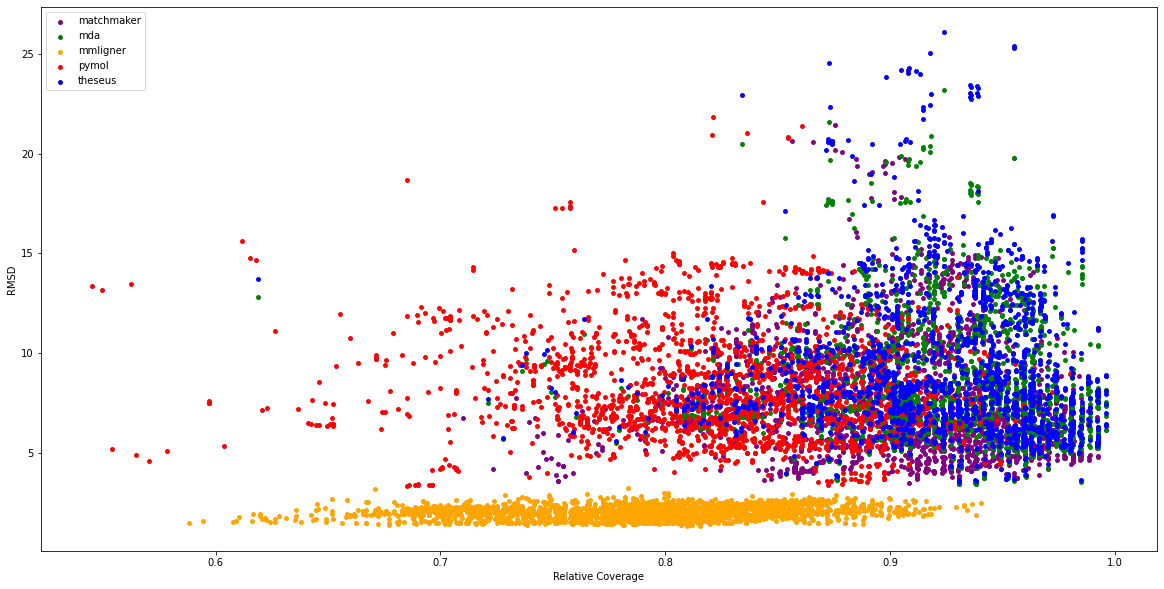

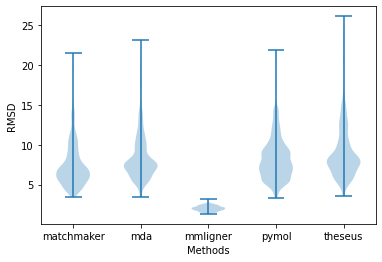

In [14]:
au.create_scatter_plot(all_CAMK_CMGC)
au.create_violine_plot(all_CAMK_CMGC)

## Check if data is normally distributed

The Kolmogorov-Smirnow-Test shows, that the values for RMSD, SI, MI, SAS and relative coverage are not normally distributed. But Theseus has a very similar distribution for the measures except the relative coverage. MMLigner performs the best for all measures except the relative coverage. MDA performs the worst for all measures.

Results of kstest:
KstestResult(statistic=0.9266956681911328, pvalue=0.0)
KstestResult(statistic=0.9636117305326499, pvalue=0.0)
KstestResult(statistic=0.7190065379254178, pvalue=0.0)
KstestResult(statistic=0.7509352155373495, pvalue=0.0)


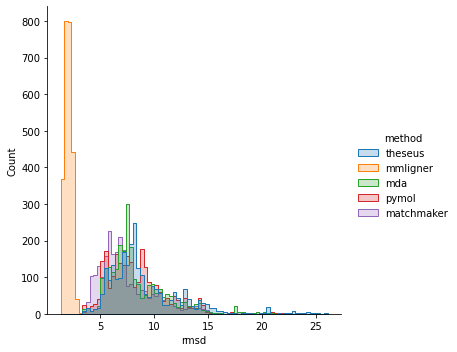

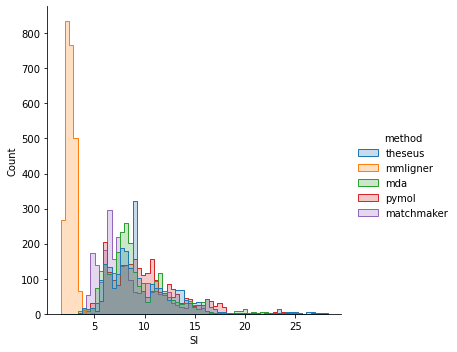

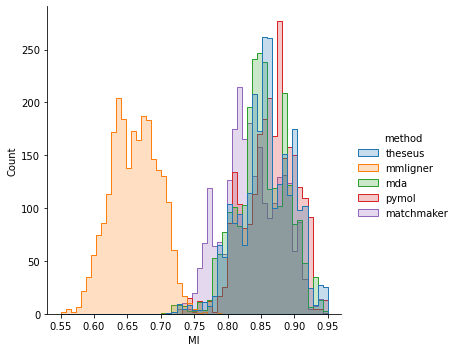

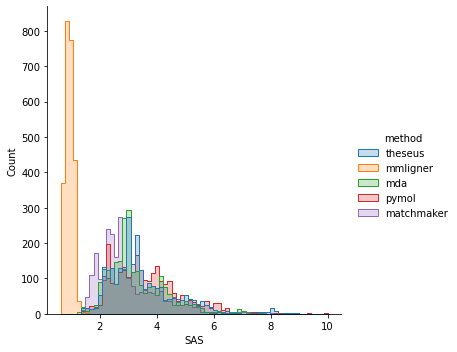

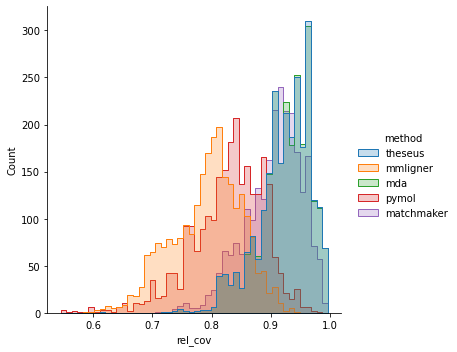

In [15]:
dist_tests = au.check_distribution(all_CAMK_CMGC)

## Compute Correlation

Since the data is not distributed normally, the spearman correlation is used.

The three quality measures correlate very well with each other and with the rmsd. The quality measures also negatively correlate with the relative coverage, which means, the lower the relative coverage, the higher the quality measures. 

The time also negatively correlates with the quality measures, which means taking more time for an alignment produces better results. This correlation in this case is highly biased by MMLigner. It takes much more time than the other methods, but also yield overall the best results.

All three quality measures share the property, that lower values mean better alignments.

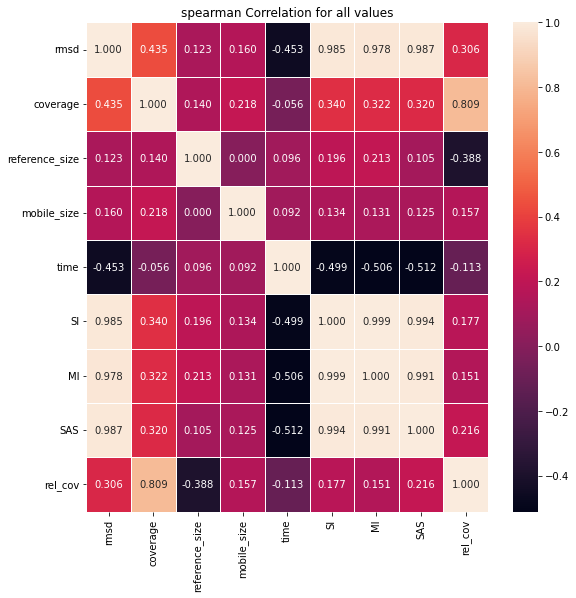

,rmsd,coverage,reference_size,mobile_size,time,SI,MI,SAS,rel_cov
rmsd,1.000000,0.434823,0.123046,0.159974,-0.453231,0.984727,0.978237,0.987200,0.306397
coverage,0.434823,1.000000,0.139991,0.218245,-0.056151,0.340177,0.322185,0.319604,0.808646
reference_size,0.123046,0.139991,1.000000,0.000433,0.096400,0.196185,0.212802,0.105415,-0.387819
mobile_size,0.159974,0.218245,0.000433,1.000000,0.092440,0.134466,0.130633,0.125378,0.157496
time,-0.453231,-0.056151,0.096400,0.092440,1.000000,-0.499066,-0.506077,-0.511504,-0.112731
SI,0.984727,0.340177,0.196185,0.134466,-0.499066,1.000000,0.999167,0.993564,0.176518
MI,0.978237,0.322185,0.212802,0.130633,-0.506077,0.999167,1.000000,0.990866,0.150979
SAS,0.987200,0.319604,0.105415,0.125378,-0.511504,0.993564,0.990866,1.000000,0.216231
rel_cov,0.306397,0.808646,-0.387819,0.157496,-0.112731,0.176518,0.150979,0.216231,1.000000


In [16]:
corr = au.compute_correlation(all_CAMK_CMGC, coeff="spearman")
corr

## Check for significant differences

Because the data is not normally distributed, an ANOVA is not suitable. Therefore the Kruskal-Wallis-Test is performed. The RMSD and the three quality measures are significantly different for the groups.

In [17]:
kruskal = au.compute_kruskal(all_CAMK_CMGC)

Kruskal Wallis results for RMSD:
KruskalResult(statistic=6202.255651831313, pvalue=0.0)


Kruskal Wallis results for Similarity Index (SI):
KruskalResult(statistic=6246.492925252139, pvalue=0.0)


Kruskal Wallis results for Match Index (MI):
KruskalResult(statistic=6268.9107829109325, pvalue=0.0)


Kruskal Wallis results for Structural Alignment Score (SAS):
KruskalResult(statistic=6270.584365639992, pvalue=0.0)


## Which groups are different

The statistics show, that all groups are significantly different from each other. Looking at the diagrams above it is still noticable, that PyMol, ChimeraX and Theseus are in the same area.

In [18]:
significant, non_significant = au.compute_mannwhitneyu(all_CAMK_CMGC)

All significant results:
Result for rmsd with theseus and pymol:
MannwhitneyuResult(statistic=3514681.5, pvalue=1.8279692351988266e-14)
Result for rmsd with theseus and mmaker:
MannwhitneyuResult(statistic=4169232.0, pvalue=2.575930622208636e-93)
Result for rmsd with theseus and mmligner:
MannwhitneyuResult(statistic=6122550.0, pvalue=0.0)
Result for rmsd with theseus and mda:
MannwhitneyuResult(statistic=3510025.0, pvalue=3.705966767938766e-14)
Result for rmsd with pymol and mmaker:
MannwhitneyuResult(statistic=3779578.5, pvalue=1.1760551008640993e-37)
Result for rmsd with pymol and mmligner:
MannwhitneyuResult(statistic=6125000.0, pvalue=0.0)
Result for rmsd with mmaker and mmligner:
MannwhitneyuResult(statistic=6125000.0, pvalue=0.0)
Result for rmsd with mmaker and mda:
MannwhitneyuResult(statistic=2354725.0, pvalue=1.80812422997709e-51)
Result for rmsd with mmligner and mda:
MannwhitneyuResult(statistic=0.0, pvalue=0.0)
Result for SI with theseus and pymol:
MannwhitneyuResult(stati

# Count the best alignments

For every pair of structures, the method that has the best quality measure is selected. The following statistics show how often a method had the best results for the quality measures.

In [19]:
best_results = au.count_best_results(all_CAMK_CMGC)

Counts of best values for the Similarity Index (SI):
mmligner      2450
mda             22
matchmaker      16
pymol           11
theseus          1
Name: method, dtype: int64


Counts of best values for the Match Index (MI):
mmligner      2450
mda             22
matchmaker      16
pymol           11
theseus          1
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS):
mmligner      2450
mda             22
matchmaker      16
pymol           11
theseus          1
Name: method, dtype: int64


Counts of best values for the Similarity Index (SI) without MMLigner:
matchmaker    1344
mda            708
pymol          446
theseus          2
Name: method, dtype: int64


Counts of best values for the Match Index (MI) without MMLigner:
matchmaker    1363
mda            739
pymol          396
theseus          2
Name: method, dtype: int64


Counts of best values for the Structural Alignment Score (SAS) without MMLigner:
matchmaker    1344
mda            708